<a href="https://colab.research.google.com/github/SuryaTeja-aiml/GenAi_2303a52007/blob/main/2303A52007_6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [82]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.api.layers import Dense
from keras.api.models import Sequential
from keras.api.layers import Dense
from keras.api.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import joblib
data = pd.read_csv('/content/drive/MyDrive/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [61]:
#preprocessing data
data.isnull().sum()
data.dropna(inplace=True)

In [62]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['mainroad'] = encoder.fit_transform(data['mainroad'])
data['guestroom'] = encoder.fit_transform(data['guestroom'])
data['basement'] = encoder.fit_transform(data['basement'])
data['hotwaterheating'] = encoder.fit_transform(data['hotwaterheating'])
data['airconditioning'] = encoder.fit_transform(data['airconditioning'])
data['prefarea'] = encoder.fit_transform(data['prefarea'])
data['furnishingstatus'] = encoder.fit_transform(data['furnishingstatus'])

In [63]:
#normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,1.0
541,0.001485,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
543,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [64]:
#training data
from sklearn.model_selection import train_test_split
X = data.drop('price', axis=1) #feature
y = data['price'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape) # (rows, columns)
print(X_test.shape)

(436, 12)
(109, 12)


In [65]:
#training model
model = Sequential([
    Dense(18, activation = 'swish',input_shape = (X_train.shape[1],)),
    Dense(26, activation = 'swish'),
    Dense(20, activation = 'swish'),
    Dense(15, activation = 'swish'),
    Dense(1, activation = 'linear')
])
#compile the model
model.compile(
    loss = 'mean_squared_error',
    optimizer = RMSprop(),
    metrics = ['mean_absolute_error']
)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 18)                  │             234 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 26)                  │             494 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 20)                  │             540 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,599 (6.25 KB)

 Trainable params: 1,599 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0831 - mean_absolute_error: 0.2381 - val_loss: 0.0598 - val_mean_absolute_error: 0.1785
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0325 - mean_absolute_error: 0.1298 - val_loss: 0.0391 - val_mean_absolute_error: 0.1441
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0983 - val_loss: 0.0319 - val_mean_absolute_error: 0.1313
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0183 - mean_absolute_error: 0.0996 - val_loss: 0.0293 - val_mean_absolute_error: 0.1244
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0163 - mean_absolute_error: 0.0937 - val_loss: 0.0267 - val_mean_absolute_error: 0.1178
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0873 - val_loss: 0.0237 - val_mean_absolute_error: 0.1109
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0135 - mean_absolute_error: 0.0868 - val_loss: 0.022

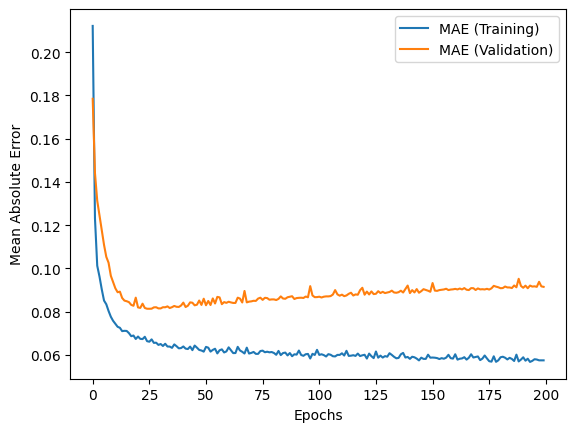

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['mean_absolute_error'], label='MAE (Training)')
plt.plot(history.history['val_mean_absolute_error'], label='MAE (Validation)')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Train RMSE: 0.07667330163059874
Test RMSE: 0.11660532362615297


In [69]:
model.save('housing_model.h5')

In [70]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [71]:
from keras.api.models import load_model
loaded_model = load_model('housing_model.h5')

In [72]:
new_data = pd.DataFrame([{
    'area' : 1500,
    'bedrooms' : 3,
    'bathrooms' : 2,
    'stories' : 2,
    'mainroad' : 1,
    'guestroom' : 1,
    'basement' : 1,
    'hotwaterheating' : 1,
    'airconditioning' : 1,
    'parking' : 2,
    'prefarea' : 1,
    'furnishingstatus' : 1
}])

In [74]:
feature_scaler = MinMaxScaler()
feature_scaler.fit(X)
X_train_scaled = feature_scaler.transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

In [79]:
new_data_scaled = feature_scaler.transform(new_data)
prediction = loaded_model.predict(new_data_scaled)
print(f'predicted Housing Price : {prediction[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
predicted Housing Price : 623.94970703125


In [80]:
prediction

array([[623.9497]], dtype=float32)